# Data Scientist Capstone:

## Section: 1

### Project Definition

#### Project Overview: 

> ##### The Mobile Gaming Industry revenue will be 152 Billion US by the end of 2019, there has been 9.6 Billion investments in the last 18 months.  If this level of investment stays at current levels, then that is higher than the combined eight year of previous investment in the industry.

> ##### As the market growth increases, there is a problem in certain regions to get users to use in-app purchase. We be using the Kaggle:  apple-app-store-strategy-games data set.


> ##### Link: https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games




#### Problem Statement:
    
    
> ##### Start up company in the  Apple mobile strategy gaming space is looking to ways to increase the global coverage and revenue.  There are three business cases for different types of Apple game apps:

##### 1:   Mobile strategy:  Storm Gang:
      
- This game contains In-app Purchases and is english only.

##### 2:   Mobile strategy:  Wildfire Rabbits :

- This game contains In-app Purchases and is multi languages.

##### 3:  Mobile strategy:  Koalas Crossing

- This game contains Price amd In-app Purchases and english only,age range: 4 to 16.


> ##### The Business Case for each Mobile strategy game has been investigated, however due to changes in the way customer has been spending there money, they want to use the apple stored data to predict where the customers will be spending there money, In-app Purchases, multi languages or age range.


#### Metrics

##### Model Performance Metrics will be using the classification_report:

-  F1, recall, precision metrics to compare how are modellings are performing

## Section: 2

#### Data Analysis

#### Data Exploration

##### Load Packages

In [67]:
# import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns

##### Load Data Set

In [7]:
df_games = pd.read_csv('appstore_games.csv')
df_games.head(1)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017


##### Visual Assessment

In [3]:
df_games.head(50)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,64333824.0,Games,"Games, Strategy, Board",3/08/2008,3/10/2018
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,1466515.0,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008


In [4]:
df_games.tail(50)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
16957,https://apps.apple.com/us/app/shoot-bubble-out...,1473192762,Shoot Bubble Out with Ryan,Amazing Puzzle Mania Ryan Game,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Look! Baby Ryan are trapped in the bubbles whe...,Hamza Ouhammou,4+,EN,224138240.0,Games,"Games, Adventure, Strategy, Entertainment",2/08/2019,2/08/2019
16958,https://apps.apple.com/us/app/dots-n-lines/id1...,1473243215,"""Dots N' Lines""",NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"2.99, 0.99, 1.99","This is a simple, fresh, and interactive intel...",Matthew Sutton,4+,"EN, ZH",38547456.0,Games,"Games, Entertainment, Casual, Strategy",21/07/2019,21/07/2019
16959,https://apps.apple.com/us/app/tower-defense-ar...,1473253256,Tower Defense Arcade Defender,"Place, Aim, Shoot",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,1.99,"* NO ADS\n\n* 5 levels for FREE, unlock full g...",mikael johansson,4+,EN,21364736.0,Games,"Games, Entertainment, Strategy, Casual",31/07/2019,31/07/2019
16960,https://apps.apple.com/us/app/color-conquest-w...,1473409499,Color Conquest - Watch Game,Conquer other side with lines,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"To mark a line, touch between the dots. To win...",Tocapp Games S.L.,4+,EN,29446144.0,Games,"Games, Strategy, Entertainment, Puzzle",1/08/2019,1/08/2019
16961,https://apps.apple.com/us/app/microsprints/id1...,1473506906,MicroSprints,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""Aplicaci\xf3 de funcionament molt seimple i i...",Ergates ITI SCP,4+,EN,8083456.0,Sports,"Sports, Racing, Games, Strategy",30/07/2019,30/07/2019
16962,https://apps.apple.com/us/app/idle-racing-tyco...,1473559573,Idle Racing Tycoon,Develop Your Car Racing Inc,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,51.0,0.00,NaN,Build your racing circuit.\n\nRecruit visitors...,Carson Brody,9+,EN,125348864.0,Games,"Games, Simulation, Strategy",31/07/2019,31/07/2019
16963,https://apps.apple.com/us/app/idle-production-...,1473561900,Idle Production Line,Building the Best Factory,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"Build your factory, build a production line.\n...",Smith Cameron,4+,EN,143180800.0,Games,"Games, Strategy, Simulation",1/08/2019,1/08/2019
16964,https://apps.apple.com/us/app/lol-flashtimer/i...,1473580709,LoL FlashTimer,Track LoL summoner spells,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,With FlashTimer you can gain insight in when t...,Philip van Wijk,4+,EN,7961600.0,Utilities,"Utilities, Games, Strategy",3/08/2019,3/08/2019
16965,https://apps.apple.com/us/app/bead-16-guti/id1...,1473594362,Bead 16 Guti,Traditional Board Game,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,1.99,"""This is also known as Sixteen Soldiers which ...",Ali Azhar,4+,EN,75273216.0,Games,"Games, Board, Strategy",30/07/2019,30/07/2019
16966,https://apps.apple.com/us/app/shoot-bubble-gal...,1473594895,Shoot Bubble Gala,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,So here is the Exciting and challenging Versio...,Shamrez Khan,4+,EN,203046912.0,Games,"Games, Puzzle, Entertainment, Strategy",26/07/2019,26/07/2019


#### Data Issues:

- URL contains the URL to the Apple Store. Looking at the link this is the US Apple Store (https://apps.apple.com/us/app) Action: Remove columns as it provided no value.

- Subtitle contain missing values - This columns provides a caption of the US Apple Store.  Action: Remove columns as it provided no value.

- Average User Rating contains missing values. Action: This will be investigate further

- Average User Rating contains missing values. Action: This will be investigate further

- In-app Purchases contains missing values. Action: This will be investigate further


##### Programmatic Assessment:

##### Basics Checks

In [5]:
df_games.shape # Shape

(17007, 18)

In [6]:
df_games.info() # Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

#### Summary Statistics

In [7]:
df_games.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


##### Checking for Missing Values:

In [8]:
df_games.isnull().sum() # Missing Values

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

##### Checking for Duplicate Rows

In [9]:
df_games.duplicated().sum()

160

##### Numerical data distribution

In [10]:
list(set(df_games.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [11]:
df_Numerical = df_games.select_dtypes(include = ['float64', 'int64']) # Extgract numeric data
df_Numerical.head(10)

,ID,Average User Rating,User Rating Count,Price,Size
0,284921427,4.0,3553.0,2.99,15853568.0
1,284926400,3.5,284.0,1.99,12328960.0
2,284946595,3.0,8376.0,0.00,674816.0
3,285755462,3.5,190394.0,0.00,21552128.0
4,285831220,3.5,28.0,2.99,34689024.0
5,286210009,3.0,47.0,0.00,48672768.0
6,286313771,2.5,35.0,0.00,6328320.0
7,286363959,2.5,125.0,0.99,64333824.0
8,286566987,2.5,44.0,0.00,2657280.0
9,286682679,2.5,184.0,0.00,1466515.0


##### Checking Unique values

In [12]:
df_games['ID'].unique() # IDs

array([ 284921427,  284926400,  284946595, ..., 1474962324, 1474963671,
       1475076711])

In [13]:
df_games['ID'].nunique() # IDs counts

16847

In [14]:
df_games['Name'].unique() # Name

array(['Sudoku', 'Reversi', 'Morocco', ..., 'Rabbit Vs Tortoise',
       'FaTaLL', 'The Three Kingdoms :Bomb'], dtype=object)

In [15]:
df_games['Name'].nunique() # Name counts

16847

In [16]:
df_games['Average User Rating'].unique() # Average User Rating counts

array([4. , 3.5, 3. , 2.5, nan, 2. , 4.5, 1.5, 5. , 1. ])

In [17]:
df_games['Average User Rating'].nunique() # Average User Ratingcounts

9

In [18]:
df_games['User Rating Count'].unique() # User Rating Count counts

array([3553.,  284., 8376., ..., 2943., 3511., 1197.])

In [19]:
df_games['User Rating Count'].nunique() # User Rating Count counts

1792

In [20]:
df_games['Developer'].unique() # Developer counts

array(['Mighty Mighty Good Games', 'Kiss The Machine', 'Bayou Games', ...,
       'Vishal Baldha', 'Tayrem Games', 'ming bo tang'], dtype=object)

In [21]:
df_games['Developer'].nunique() # Developer counts

8693

In [22]:
df_games['Age Rating'].unique() # Age Rating counts

array(['4+', '9+', '12+', '17+'], dtype=object)

In [23]:
df_games['Age Rating'].nunique() # Age Rating counts

4

In [24]:
df_games['Languages'].unique() # Languages

array(['DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES, SV, ZH',
       'EN', 'DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU, ZH, ES, SV',
       nan, 'FR', 'EN, FR, DE, IT, ES', 'EN, FR',
       'EN, FR, DE, EL, PT, RU, ZH, ES', 'EN, FR, DE, JA, KO, ZH',
       'EN, JA', 'DA, NL, EN, FR, DE, IT, NO, NB, PT, ES, SV', 'NL, EN',
       'EN, FR, DE, JA', 'EN, DE', 'ZH, EN',
       'AR, ZH, CS, EN, FR, DE, IT, JA, PL, PT, RU, ES, TR',
       'DA, NL, EN, FI, FR, DE, IT, NO, PT, ES, SV',
       'EN, FR, DE, JA, KO, RU, ZH, ES, ZH', 'EN, ZH, ZH', 'EN, JA, ZH',
       'AR, CS, NL, EN, FR, DE, ID, IT, JA, KO, PL, PT, RU, ZH, ES, SV, TH, ZH, TR, VI',
       'EN, FR, DE', 'EN, FR, JA, ES', 'EN, IT, ES', 'EN, FR, DE, IT, RU',
       'AR, BN, BG, CA, HR, CS, DA, NL, EN, ET, FI, FR, DE, EL, GU, HE, HI, HU, ID, GA, IT, JA, KN, KO, LV, LT, MS, ML, MR, NB, PL, PT, RO, RU, SR, ZH, SK, SL, ES, SV, TA, TE, TH, ZH, TR, UK, UR, VI',
       'AF, SQ, AR, HY, AZ, EU, BE, BN, BS, BG, CA, HR, CS, D

In [25]:
df_games['Languages'].nunique() # Languages

990

In [26]:
df_games['Primary Genre'].unique() # Primary Genre

array(['Games', 'Entertainment', 'Finance', 'Sports', 'Reference',
       'Medical', 'Education', 'Utilities', 'Book', 'Travel',
       'Productivity', 'Lifestyle', 'Business', 'News',
       'Social Networking', 'Health & Fitness', 'Music', 'Stickers',
       'Food & Drink', 'Shopping', 'Navigation'], dtype=object)

In [27]:
df_games['Primary Genre'].nunique() # Primary Genre

21

In [28]:
df_games['Genres'].unique() # Genres

array(['Games, Strategy, Puzzle', 'Games, Strategy, Board',
       'Games, Board, Strategy', ..., 'Games, Strategy, Sports, Music',
       'Social Networking, Games, Strategy, Casual',
       'Sports, Racing, Games, Strategy'], dtype=object)

In [29]:
df_games['Genres'].nunique() # Genres counts

1004

#### Looking at the Price column with Primary Genre, Genres,Developer

##### Primary Genre

In [30]:
Primary_Genre = df_games.groupby('Primary Genre')['Price'].sum().sort_values(ascending=False)
Primary_Genre 

Primary Genre
Games                13009.31
Education              376.12
Finance                139.99
Utilities               63.80
Business                58.91
Entertainment           48.73
Sports                  29.90
Stickers                28.76
Productivity            23.94
Reference               23.88
Lifestyle                5.98
Food & Drink             1.99
Book                     1.99
Health & Fitness         0.99
Medical                  0.00
Travel                   0.00
Navigation               0.00
News                     0.00
Shopping                 0.00
Social Networking        0.00
Music                    0.00
Name: Price, dtype: float64

##### Genres

In [31]:
df_Genres_Price = df_games.groupby('Genres')['Price'].sum().sort_values(ascending=False)
df_Genres_Price

Genres
Games, Strategy, Simulation                         3148.00
Games, Simulation, Strategy                         2811.01
Games, Board, Strategy                               295.24
Games, Strategy                                      258.19
Games, Strategy, Board                               249.17
Games, Role Playing, Strategy                        201.45
Games, Strategy, Role Playing                        195.54
Games, Puzzle, Strategy                              188.99
Games, Entertainment, Strategy, Board                182.58
Games, Strategy, Board, Entertainment                176.63
Games, Strategy, Puzzle                              176.06
Games, Strategy, Casual                              174.60
Games, Board, Entertainment, Strategy                154.62
Games, Puzzle, Strategy, Entertainment               145.31
Finance, Simulation, Strategy, Games                 139.99
Games, Strategy, Action                              125.49
Games, Strategy, Entertainment, P

##### Developer

In [32]:
df_Developer_price = df_games.groupby('Developer')['Price'].sum().sort_values(ascending=False)
df_Developer_price

Developer
Andrew Kudrin                       5219.71
Domyung Kim                          679.43
Mitee Games                          250.74
Slitherine                           218.81
HexWar Games Ltd                     190.61
Game Maveriks                        179.99
GabySoft                             149.25
Astontek Inc                         139.99
Tayga Games OOO                      115.83
Key Player Publishing Limited         99.99
GOTO Games                            95.95
8Floor                                78.79
Kairosoft Co.,Ltd                     75.85
Asmodee Digital                       58.88
Ting Wang                             57.82
HandyGames                            53.87
John Tiller                           53.82
Spiderweb Software                    51.94
Flipline Studios                      48.79
Rishav Singla                         45.84
Renato Erive                          44.85
Raj Rani                              44.85
Overhaul Games        

#### Looking at the User Rating Count column with Primary Genre, Genres,Developer

##### Primary Genre

In [33]:
df_Primary_Rating  = df_games.groupby('Primary Genre')['User Rating Count'].sum().sort_values(ascending=False)
df_Primary_Rating 

Primary Genre
Games                24652736.0
Sports                 247889.0
Finance                 61803.0
Entertainment           15788.0
Utilities                6584.0
Education                5745.0
Reference                2770.0
Medical                  2458.0
Navigation               1094.0
Lifestyle                 999.0
Health & Fitness          895.0
Social Networking         660.0
News                      377.0
Book                      288.0
Productivity              200.0
Music                     146.0
Shopping                  145.0
Stickers                   58.0
Business                   33.0
Travel                      8.0
Food & Drink                7.0
Name: User Rating Count, dtype: float64

##### Genres

In [34]:
df_Genres_Rating = df_games.groupby('Genres')['User Rating Count'].sum().sort_values(ascending=False)
df_Genres_Rating

Genres
Games, Action, Entertainment, Strategy             3478241.0
Games, Strategy, Entertainment, Action             1790418.0
Games, Strategy, Action                            1313753.0
Games, Action, Strategy                            1233894.0
Games, Strategy, Role Playing                      1011530.0
Games, Strategy, Entertainment, Simulation          898302.0
Games, Simulation, Strategy                         896413.0
Games, Entertainment, Action, Strategy              875342.0
Games, Strategy, Simulation                         829540.0
Games, Simulation, Strategy, Entertainment          647881.0
Games, Strategy, Action, Entertainment              640312.0
Games, Entertainment, Casual, Strategy              556666.0
Games, Simulation, Entertainment, Strategy          526253.0
Games, Strategy, Puzzle                             498398.0
Games, Strategy, Entertainment, Adventure           490439.0
Games, Strategy, Role Playing, Health & Fitness     439776.0
Games, Puzzle, St

##### Developer

In [35]:
df_Developer_Rating = df_games.groupby('Developer')['User Rating Count'].sum().sort_values(ascending=False)
df_Developer_Rating

Developer
Supercell                                     4710616.0
Tencent Mobile International Limited           711409.0
Electronic Arts                                593165.0
Ninja Kiwi                                     476661.0
PopCap                                         469562.0
Lion Studios                                   453471.0
Niantic, Inc.                                  444110.0
Donut Games                                    428938.0
Glu Games Inc                                  406341.0
Nordcurrent                                    317375.0
TapJoy                                         311224.0
Green Panda Games                              309790.0
NaturalMotion                                  307872.0
Kolibri Games GmbH                             295707.0
Tapps Tecnologia da Informa\xe7\xe3o Ltda.     274850.0
Miniclip.com                                   257852.0
Fun Games For Free                             237871.0
moonton                               

##### Looking at the Average User Rating column with Primary Genre, Genres,Developer

##### Primary Genre

In [36]:
df_Primary_Average = df_games.groupby('Primary Genre')['Average User Rating'].sum().sort_values(ascending=False)
df_Primary_Average

Primary Genre
Games                29644.5
Entertainment          352.5
Education              191.0
Utilities              178.5
Sports                  97.0
Reference               60.5
Finance                 32.5
Productivity            26.0
Book                    21.5
Health & Fitness        13.5
Music                   13.5
Lifestyle               12.5
Social Networking       11.5
Stickers                11.0
News                     9.5
Medical                  6.0
Business                 6.0
Food & Drink             5.0
Shopping                 4.5
Navigation               4.0
Travel                   3.5
Name: Average User Rating, dtype: float64

##### Genres

In [37]:
df_Genres_Average = df_games.groupby('Genres')['Average User Rating'].sum().sort_values(ascending=False)
df_Genres_Average

Genres
Games, Simulation, Strategy                       1169.0
Games, Strategy, Simulation                       1163.5
Games, Strategy, Puzzle                           1104.5
Games, Strategy, Action                           1073.0
Games, Puzzle, Strategy                            924.0
Games, Strategy                                    889.0
Games, Action, Strategy                            863.0
Games, Strategy, Role Playing                      769.0
Games, Role Playing, Strategy                      734.0
Games, Strategy, Puzzle, Entertainment             577.5
Games, Board, Strategy                             548.5
Games, Strategy, Entertainment, Puzzle             538.5
Games, Puzzle, Strategy, Entertainment             519.5
Games, Strategy, Board                             517.5
Games, Entertainment, Puzzle, Strategy             489.5
Games, Strategy, Entertainment, Simulation         424.5
Games, Casual, Strategy                            417.5
Games, Strategy, Casual 

##### Developer

In [588]:
df_Developer_Average = df_games.groupby('Developer')['Average User Rating'].sum().sort_values(ascending=False)
df_Developer_Average

Developer
Tapps Tecnologia da Informa\xe7\xe3o Ltda.    508.0
Detention Apps                                169.0
EASY Inc.                                     144.0
Qumaron                                       132.0
8Floor                                        116.0
HexWar Games Ltd                              115.5
Evolution Games GmbH                           98.5
Flipline Studios                               95.5
Andrew Kudrin                                  91.0
Kairosoft Co.,Ltd                              91.0
Chen Yong Min                                  85.5
Psycho Bear Studios                            81.5
Romit Dodhia                                   80.0
HandyGames                                     79.0
MOBIRIX                                        76.5
HeroCraft Ltd.                                 76.0
Lazy Days, LLC                                 74.0
Ninja Kiwi                                     73.0
Conceptis Ltd.                                 73.0
Gl

#### Data Visualization

##### Looking at the Numerical values in the data set using Histogram:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a3afb38>,
      dtype=object)

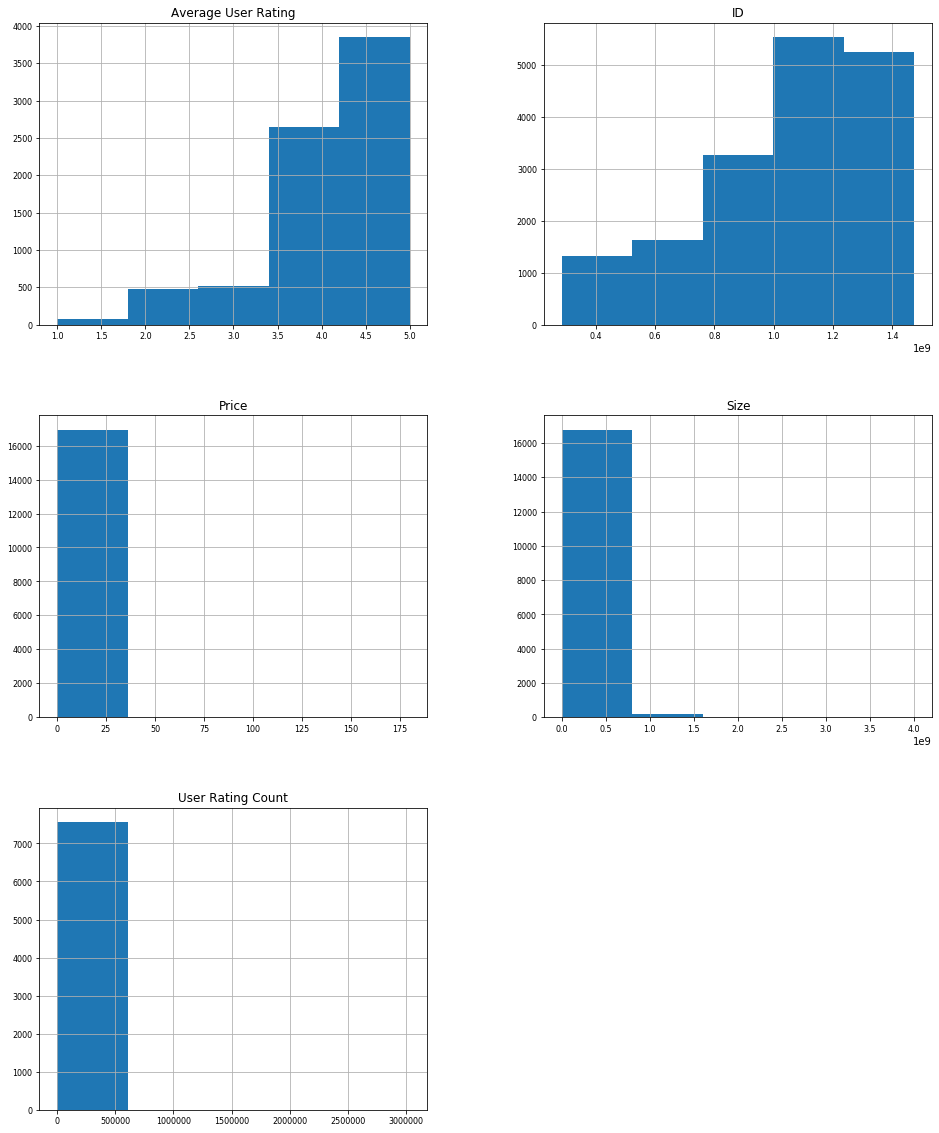

In [39]:
df_Numerical.hist(figsize=(16, 20), bins=5, xlabelsize=8, ylabelsize=8)

#### Looking at the Price column with Primary Genre, Genres,Developer using Visuals

#### Primary Genre

count       21.000000
mean       657.823333
std       2831.330716
min          0.000000
25%          0.000000
50%          5.980000
75%         48.730000
max      13009.310000
Name: Price, dtype: float64


Text(0.5, 1.0, 'Primary Genre - Group with Price')

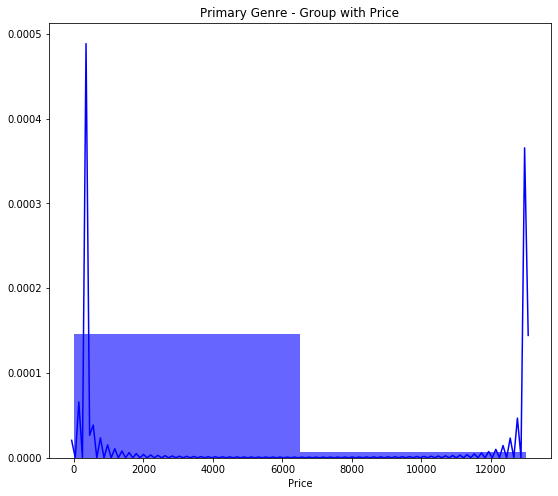

In [40]:
print(Primary_Genre.describe())

plt.figure(figsize=(9, 8))
sns.distplot(Primary_Genre , color='b', bins=2, hist_kws={'alpha': 0.6});
plt.title("Primary Genre - Group with Price")

##### Genres

count    1004.000000
mean       13.759253
std       135.562633
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max      3148.000000
Name: Price, dtype: float64


Text(0.5, 1.0, 'Genres - Group with Price')

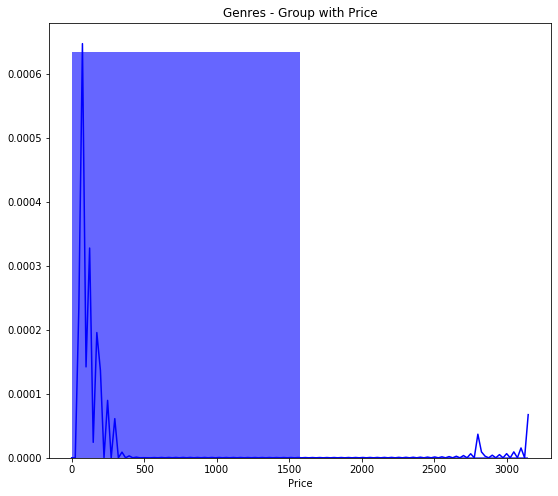

In [41]:
print(df_Genres_Price.describe())

plt.figure(figsize=(9, 8))
sns.distplot(df_Genres_Price , color='b', bins=2, hist_kws={'alpha': 0.6});
plt.title("Genres - Group with Price")

##### Developer

count    8693.000000
mean        1.589128
std        56.795496
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5219.710000
Name: Price, dtype: float64


Text(0.5, 1.0, 'Developer - Group with Price')

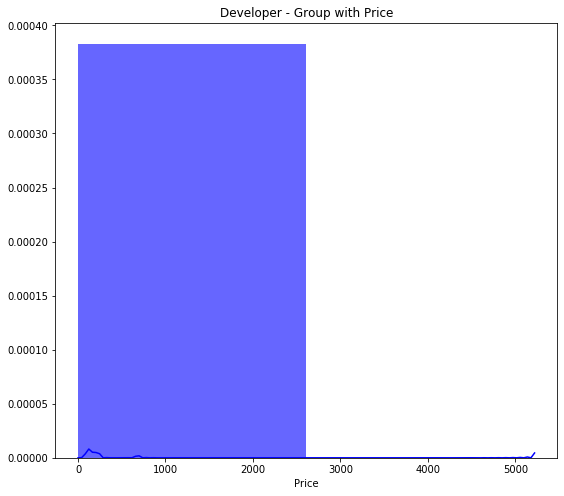

In [42]:
print(df_Developer_price.describe())

plt.figure(figsize=(9, 8))
sns.distplot(df_Developer_price , color='b', bins=2, hist_kws={'alpha': 0.6});
plt.title("Developer - Group with Price")

#### Looking at the User Rating Count column with Primary Genre, Genres,Developer using visual

#### Primary Genre

count    2.100000e+01
mean     1.190509e+06
std      5.376149e+06
min      7.000000e+00
25%      1.460000e+02
50%      8.950000e+02
75%      5.745000e+03
max      2.465274e+07
Name: User Rating Count, dtype: float64


Text(0.5, 1.0, 'Primary Genre - User Rating Count')

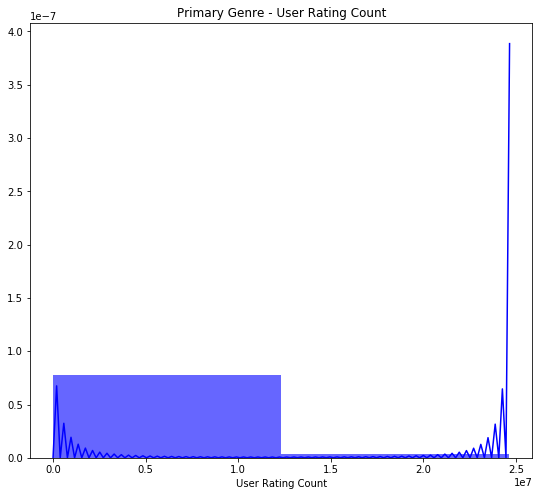

In [43]:
print(df_Primary_Rating.describe())

plt.figure(figsize=(9, 8))
sns.distplot(df_Primary_Rating, color='b', bins=2, hist_kws={'alpha': 0.6});
plt.title("Primary Genre - User Rating Count")

##### Genres

count    1.004000e+03
mean     2.490108e+04
std      1.597132e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.400000e+01
75%      2.505000e+02
max      3.478241e+06
Name: User Rating Count, dtype: float64


Text(0.5, 1.0, 'Genres- User Rating Count')

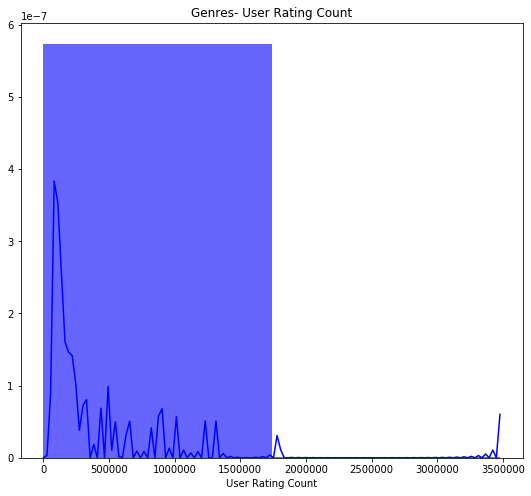

In [44]:
print(df_Genres_Rating.describe())

plt.figure(figsize=(9, 8))
sns.distplot(df_Genres_Rating, color='b', bins=2, hist_kws={'alpha': 0.6});
plt.title("Genres- User Rating Count")

##### Developer

count    8.693000e+03
mean     2.875956e+03
std      5.474653e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.800000e+01
max      4.710616e+06
Name: User Rating Count, dtype: float64


Text(0.5, 1.0, 'Developer - User Rating Count')

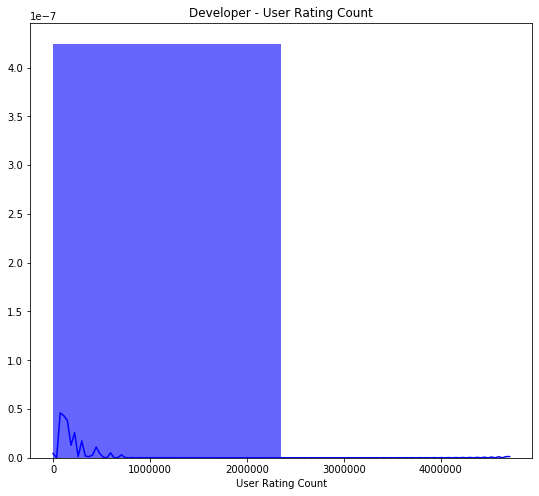

In [45]:
print(df_Developer_Rating.describe())

plt.figure(figsize=(9, 8))
sns.distplot(df_Developer_Rating , color='b', bins=2, hist_kws={'alpha': 0.6});
plt.title("Developer - User Rating Count")

##### Looking at the Average User Rating column with Primary Genre, Genres,Developer using Visuals

##### Primary Genre

count       21.000000
mean      1462.119048
std       6457.985827
min          3.500000
25%          6.000000
50%         13.500000
75%         60.500000
max      29644.500000
Name: Average User Rating, dtype: float64


Text(0.5, 1.0, 'Primary Genre - Average User Rating')

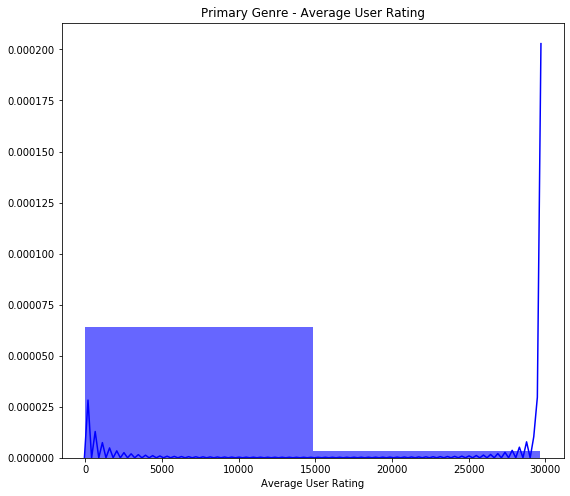

In [46]:
print(df_Primary_Average.describe())

plt.figure(figsize=(9, 8))
sns.distplot(df_Primary_Average , color='b', bins=2, hist_kws={'alpha': 0.6});
plt.title("Primary Genre - Average User Rating")

##### Genres

count    1004.000000
mean       30.582171
std       115.155292
min         0.000000
25%         0.000000
50%         4.000000
75%         8.000000
max      1169.000000
Name: Average User Rating, dtype: float64


Text(0.5, 1.0, 'Genres - Average User Rating')

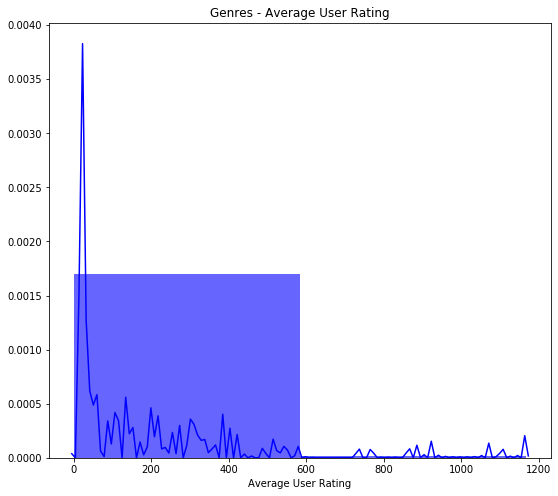

In [47]:
print(df_Genres_Average.describe())

plt.figure(figsize=(9, 8))
sns.distplot(df_Genres_Average , color='b', bins=2, hist_kws={'alpha': 0.6});
plt.title("Genres - Average User Rating")

##### Developer

count    8693.000000
mean        3.532095
std         9.098515
min         0.000000
25%         0.000000
50%         0.000000
75%         4.500000
max       508.000000
Name: Average User Rating, dtype: float64


Text(0.5, 1.0, 'Developer - Average User Rating')

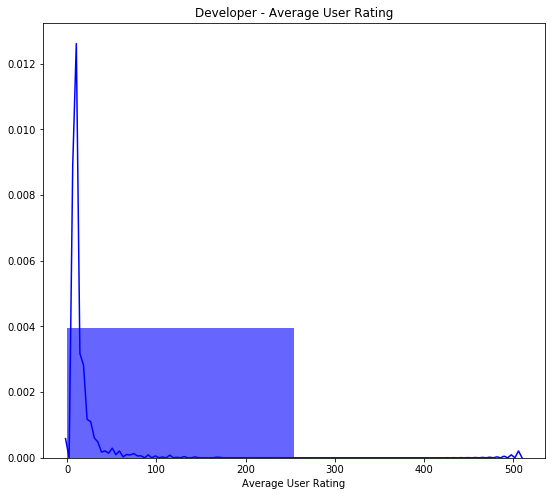

In [48]:
print(df_Developer_Average.describe())

plt.figure(figsize=(9, 8))
sns.distplot(df_Developer_Average , color='b', bins=2, hist_kws={'alpha': 0.6});
plt.title("Developer - Average User Rating")

##### Looking at the Correlation with in the gaming Data Set



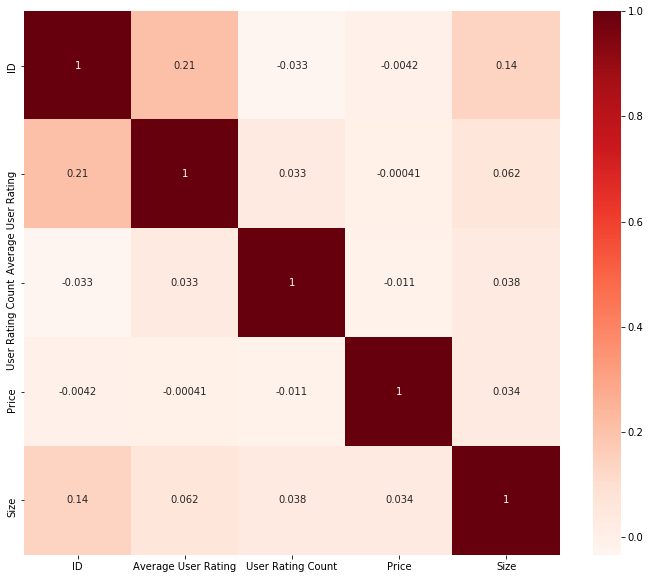

In [49]:
#Correlation
plt.figure(figsize=(12,10))
cor = df_games.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Looking at the Primary Genre with in the Data Set

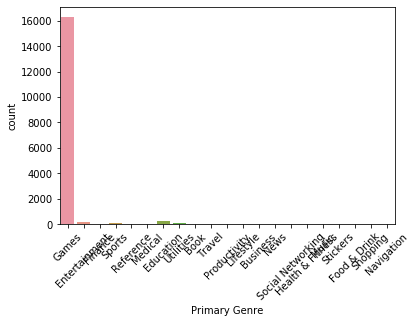

In [51]:
sns.countplot(x='Primary Genre', data=df_games);
plt.xticks(rotation=45);

In [279]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

#### Issues:

##### Looking at the data issues:

- Subtitle column contains basic key words of the Game and contain 5261. Action: To Reduce Missing value this column will be dropped.

- Average User Rating contains 7561 rows. Action: Will use the column nan fill to fill in the missing values

- Price cotains 16983 rows. There are Gaming Applications that are zero cost and have In-app Purchases.  Action: Will use the column nan fill to fill in the blanks.

- In-app Purchases cotains 7683 rows.  There are Gaming Applications that have no In-app Purchases.  Action: Will use nan fill to fill in the blanks

- Languages contains 16947 rows.  Action:  Will use Eng as the Fault as this is a US website.

- Size contains 17006 rows.  Action: This column contains no value and will be Dropped. 

- There are 160 Duplicates rows.  Action: These will be removed.

- In-app Purchases is currently a non-null object. Action: Need to split the values into new columns

- The data set contains no gaming data. Action:  This will be filter out.

- Age Rating columns contains + sigh. This will be remove and the column set to int for feature engineering


#### Looking at the Visual:

- The Primary Genre contains non gamming applications.  We can see the Gaming data causing Outiers.  The non gamming data will be removed. 


- The Genres contains over 1004 data points.  This will be reduce to core gaming Genres.

- The Correlation with in the gaming Data Set show ID and Size have matching features. 


## Section: 3

#### Methodology

#### Data Preprocessing

###### All preprocessing steps:

- Subtitle column contains basic key words of the Game and contain 5261. Action: To Reduce Missing value this column will be dropped.

- Average User Rating contains 7561 rows. Action: Will use the column average to fill in the missing values

- Price cotains 16983 rows. There are Gaming Applications that are zero cost and have In-app Purchases.  Action: Will use the column average to fill in the blanks.

- In-app Purchases cotains 7683 rows.  There are Gaming Applications that have no In-app Purchases.  Action: Will use zero to fill in the blanks

- Languages contains 16947 rows.  Action:  Will use Eng as the Fault as this is a US website.

- Size contains 17006 rows.  Action: This column contains no value and will be Dropped. 
                         1
- There are 160 Duplicates rows.  Action: These will be removed.

- In-app Purchases is currently a non-null object. Action: Need to split the values into new columns

- The data set contains no gaming data. Action:  This will be filter out.

- The Data Set contains 160 duplicate rows. Remove Duplicate entries.

- URL contains the link to the US Apple Store. This will be drop, due to it not providing value for our modeling.

- ID is the application ID with in the US Apple Store.  This will be drop, due to it not providing value for our modeling.

- Subtitle contain a brief description with in the US Apple Store.  This will be drop, due to it not providing value for our modeling.

- Icon URL contains the ICON Image link with in the US Apple Store.  This will be drop, due to it not providing value for our modeling.

- Description contains a description of the application/game with in the US Apple Store. This will be drop, due to it not providing value for our modeling.

- Size contains the data size of the with in the US Apple Store. This will be drop, due to it not providing value for our modeling.

- Age Rating columns contains + sigh. This will be remove and the column set to int for feature engineering

##### Cleaning Data Set:

##### Copying Data Set

Copy

In [8]:
df_games_clean = df_games.copy()

Test

In [9]:
df_games_clean.shape

(17007, 18)

#### Define: The problem is focusing on Gamming Mobile Applications.  There are non gamming Applications with in the in the data set These will be removed:

##### Steps:

- Sub Set the Data set by using Primary Genre equals Games
- Reindex the data set after sub settings
- Drop Primary Genre as its not required

Code

In [10]:
df_games_clean = df_games_clean.loc[df_games_clean['Primary Genre']=='Games']

In [11]:
df_games_clean.index = pd.RangeIndex(len(df_games_clean.index)) # Reindex data set

In [12]:
df_games_clean.drop(['Primary Genre'],axis=1,inplace=True)

Test

In [13]:
df_games_clean.shape

(16286, 17)

#### Define: Remove Dupicates from the data set:

##### There are 166 duplicates with in the Gaming Data set:
        
##### Steps:

- Use the drop Duplicates function

Code

In [14]:
df_games_clean.drop_duplicates(inplace=True)

Test

In [15]:
df_games_clean.duplicated().sum()

0

#### Define: Age Rating columns contains + sign. This will be remove and the column set to int for feature engineering

Code

In [16]:
df_games_clean['Age Rating'] = df_games_clean['Age Rating'].str.replace('+','').str.replace(' ','').astype(int)

Test

In [17]:
df_games_clean['Age Rating'].unique()

array([ 4,  9, 12, 17])

#### Define: Replace NaN with 0 in the following columns:

1: The Price columns contains games that are free and have In-app Purchases or are free and do not have In-app Purchases. The nana will be replace with 0.

2: The Average User Rating and User Rating Count application with no ratings due to Release Date columns

Code

In [18]:
df_games_clean['Average User Rating'] = pd.to_numeric(df_games_clean['Average User Rating'], downcast='integer').fillna(0)
df_games_clean['User Rating Count'] = pd.to_numeric(df_games_clean['Average User Rating'], downcast='integer').fillna(0)
df_games_clean['Price'] = pd.to_numeric(df_games_clean['Average User Rating'], downcast='integer').fillna(0)

Test

In [19]:
df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16135 entries, 0 to 16285
Data columns (total 17 columns):
URL                             16135 non-null object
ID                              16135 non-null int64
Name                            16135 non-null object
Subtitle                        4924 non-null object
Icon URL                        16135 non-null object
Average User Rating             16135 non-null float64
User Rating Count               16135 non-null float64
Price                           16135 non-null float64
In-app Purchases                7419 non-null object
Description                     16135 non-null object
Developer                       16135 non-null object
Age Rating                      16135 non-null int64
Languages                       16080 non-null object
Size                            16134 non-null float64
Genres                          16135 non-null object
Original Release Date           16135 non-null object
Current Version Release Dat

#### Define:  The Languages contains no values. Replacing this Nan wih None for feature Engineering

Code

In [20]:
df_games_clean['Languages']= df_games_clean['Languages'].fillna("None")

Test

In [21]:
df_games_clean['Languages'].isnull().sum()

0

#### Define:  Drop colums thate are not required for Feature Engineering and Modelling

Code

In [22]:
df_games_clean.drop(['ID','URL','Subtitle','Icon URL','Description','Size','Original Release Date','Current Version Release Date'],axis=1,inplace=True)

Test

In [23]:
df_games_clean.shape

(16135, 9)

#### Define:  There are currently 1004 different Genres with the the data set.

- The first entry contains game, where the other columns contain similar information. 
- Will split and use the first column to obtain the Genres



Code

In [24]:
df_games_clean = df_games_clean.join(df_games_clean['Genres'].str.split(',', expand=True).add_prefix('Genres'))
df_games_clean.drop(['Genres0','Genres2','Genres3','Genres4','Genres5',],axis=1,inplace=True)
df_games_clean.rename(columns={'Genres1':'Genres_label'},inplace=True)

Test

In [25]:
df_games_clean['Genres_label'].unique()

array([' Strategy', ' Board', ' Entertainment', ' Casual', ' Puzzle',
       ' Card', ' Finance', ' Sports', ' Family', ' Action', ' Adventure',
       ' Role Playing', ' Travel', ' Simulation', ' Education',
       ' Lifestyle', ' Social Networking', ' Casino', ' Trivia',
       ' Reference', ' Word', ' Utilities', ' Racing', ' Books',
       ' Medical', ' Music', ' Food & Drink', ' Navigation',
       ' Health & Fitness', ' Photo & Video', ' Productivity', ' News',
       ' Business', ' Stickers', ' Magazines & Newspapers'], dtype=object)

In [26]:
df_games_clean['Genres_label'].nunique()

35

##### Feature Engineering

##### This section determine Feature that will be created for the Modelling:

###### Feature Engineering Section: 1

###### Feature 1:

> ###### Define: The amount of supported Languages: 

- Count the number of Supported Languages

###### Feature 2:

> ###### Define:  Average Supported Languages by 

- 2.1: Developer


###### Feature 3:

> ###### Feature 3: Average Price by 

- 3.1: Developer



###### Feature 4:
    
> ###### Feature 4: Average In-app Purchases Price by 

- 4.1: Developer
- 4.2: Age Rating






    

##### Feature Creation Section

###### Feature 1:

> ###### Define: The amount of supported Languages: 

- Count the number of Supported Languages

Code

In [27]:
df_games_clean['Multi_Languages'] = df_games_clean['Languages'].str.split(',').apply(len)

Test

In [28]:
df_games_clean['Multi_Languages'].unique()

array([ 17,   1,  15,   5,   2,   8,   6,  11,   4,  13,   9,   3,  20,
        66,   7,  10,  18,  12,  14,  19,  33,  22,  26,  30,  31,  24,
        16,  21,  25,  27,  65,  32,  23,  29,  36,  49,  28,  46,  45,
        42,  44,  43,  35,  34, 111,  76])

###### Feature 2:

> ###### Define:  Average Supported Languages by 

- 2.1: Developer
- 2.2: Genres_label

##### Developer

Code

In [29]:
df_Languages_dev = df_games_clean.groupby(['Developer'])['Multi_Languages'].agg(['mean'])
df_Languages_dev.columns = ['mean_Languages_dev']
df_games_clean = df_games_clean.merge(df_Languages_dev, left_on = 'Developer', right_index=True, how = 'left')
df_games_clean['mean_Languages_dev'] = df_games_clean['mean_Languages_dev'].astype(int)

Test

In [30]:
df_games_clean['mean_Languages_dev'].head()

0    17
1     1
2     1
3    17
4    15
Name: mean_Languages_dev, dtype: int64

###### Feature 3:

> ###### Feature 3: Average Price by 

- 3.1: Developer
- 3.2: Genres_label

##### Developer

Code

In [31]:
df_Price_Developer = df_games_clean.groupby(['Developer'])['Price'].agg(['mean'])
df_Price_Developer.columns = ['mean_Price_Developer']
df_games_clean = df_games_clean.merge(df_Price_Developer, left_on = 'Developer', right_index=True, how = 'left')
df_games_clean['mean_Price_Developer'] = df_games_clean['mean_Price_Developer'].astype(int)

Test

In [32]:
df_games_clean['mean_Price_Developer'].head()

0    3
1    3
2    3
3    3
4    3
Name: mean_Price_Developer, dtype: int64

###### Feature 4:
    
> ###### Feature 4: Average In-app Purchases Price by 

- 3.1: Developer

    
#### Note: Focusing on the First Values of the In-app Purchases

#### Creating the Purchases0 by using the In-app Purchases

- Remove Whitespace
- Split by , delimiter
- Drop Columns that are not required 
- Convert to an integer

Code

In [33]:
df_games_clean['In-app Purchases'] = df_games_clean['In-app Purchases'].str.replace(' ','') # remove white spaces

In [34]:
df_games_clean = df_games_clean.join(df_games_clean['In-app Purchases'].str.split(',', expand=True).add_prefix('Purchases')).fillna(0)

In [35]:
df_games_clean.drop(['Purchases1','Purchases2','Purchases3','Purchases4','Purchases5','Purchases6','Purchases7','Purchases8'],axis=1,inplace=True)

In [36]:
df_games_clean.drop(['Purchases9','Purchases10','Purchases11','Purchases12','Purchases13','Purchases14','Purchases15','Purchases16'],axis=1,inplace=True)

In [37]:
df_games_clean['Purchases0'] = pd.to_numeric(df_games_clean['Purchases0']).fillna(0, downcast='infer')  

Test

In [38]:
df_games_clean.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Genres,Genres_label,Multi_Languages,mean_Languages_dev,mean_Price_Developer,Purchases0
0,Sudoku,4.0,4.0,4.0,0,Mighty Mighty Good Games,4,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...","Games, Strategy, Puzzle",Strategy,17,17,3,0.0
1,Reversi,3.5,3.5,3.5,0,Kiss The Machine,4,EN,"Games, Strategy, Board",Strategy,1,1,3,0.0
2,Morocco,3.0,3.0,3.0,0,Bayou Games,4,EN,"Games, Board, Strategy",Board,1,1,3,0.0
3,Sudoku (Free),3.5,3.5,3.5,0,Mighty Mighty Good Games,4,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...","Games, Strategy, Puzzle",Strategy,17,17,3,0.0
4,Senet Deluxe,3.5,3.5,3.5,0,RoGame Software,4,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...","Games, Strategy, Board, Education",Strategy,15,15,3,0.0


##### Feature 4: Average In-app Purchases Price by

Developer

Code

In [39]:
df_app_purchases = df_games_clean.groupby(['Developer'])['Purchases0'].agg(['mean'])
df_app_purchases.columns = ['mean_app_purchases_dev']
df_games_clean = df_games_clean.merge(df_app_purchases, left_on = 'Developer', right_index=True, how = 'left')
df_games_clean['mean_app_purchases_dev'] = df_games_clean['mean_app_purchases_dev'].astype(int)

Test

In [40]:
df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16135 entries, 0 to 16285
Data columns (total 15 columns):
Name                      16135 non-null object
Average User Rating       16135 non-null float64
User Rating Count         16135 non-null float64
Price                     16135 non-null float64
In-app Purchases          16135 non-null object
Developer                 16135 non-null object
Age Rating                16135 non-null int64
Languages                 16135 non-null object
Genres                    16135 non-null object
Genres_label              16135 non-null object
Multi_Languages           16135 non-null int64
mean_Languages_dev        16135 non-null int64
mean_Price_Developer      16135 non-null int64
Purchases0                16135 non-null float64
mean_app_purchases_dev    16135 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 2.6+ MB


#####  Age Rating

Code

In [41]:
df_app_purchases_Age = df_games_clean.groupby(['Age Rating'])['Purchases0'].agg(['mean'])
df_app_purchases_Age.columns = ['mean_app_purchases_age']
df_games_clean = df_games_clean.merge(df_app_purchases_Age, left_on = 'Age Rating', right_index=True, how = 'left')
df_games_clean['mean_app_purchases_age'] = df_games_clean['mean_app_purchases_age'].astype(int)

Test

In [42]:
df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16135 entries, 0 to 16285
Data columns (total 16 columns):
Name                      16135 non-null object
Average User Rating       16135 non-null float64
User Rating Count         16135 non-null float64
Price                     16135 non-null float64
In-app Purchases          16135 non-null object
Developer                 16135 non-null object
Age Rating                16135 non-null int64
Languages                 16135 non-null object
Genres                    16135 non-null object
Genres_label              16135 non-null object
Multi_Languages           16135 non-null int64
mean_Languages_dev        16135 non-null int64
mean_Price_Developer      16135 non-null int64
Purchases0                16135 non-null float64
mean_app_purchases_dev    16135 non-null int64
mean_app_purchases_age    16135 non-null int64
dtypes: float64(4), int64(6), object(6)
memory usage: 2.7+ MB


#### Implementation

#### Classifier Modeller:

> These are the two Classifier Modeller in my ML pipeline:

- Random Forest Classifier

- Logistic Regression

##### Creating Feature Names and X and Y variables.

In [43]:
feature_names = ['Age Rating','Multi_Languages','mean_Languages_dev','mean_Price_Developer','mean_app_purchases_dev','mean_app_purchases_age']

X = df_games_clean['Genres_label']
Y = df_games_clean[feature_names]

##### Split data into train and test sets

In [44]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

###### Write a tokenization function to process your text data - ML pipeline Project

In [45]:
def tokenize(text):
    """
    Doc String: 
    Inputs:
    
    Text Data gets tokenize text , normalize, lemmatize, 
    using the nltk package
    
    Returns: Text data that has been normalize, lemmatize, and tokenize 
        
    """
    # Normalize
    # Set text to lower case and remove punctuation
    text= text.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) # Remove punctuation characters
    # Tokenize words 
    tokens = word_tokenize(text)
    # lemmatizer and remove stopwords
    # lemmatizer
    lemmatizer = WordNetLemmatizer()
    # stopwords
    stop_words = set(stopwords.words('english'))
    # lemmatizer and remove stopwords
    output = [lemmatizer.lemmatize(w) for w in tokens if not w in stop_words]
    output = [] 
    for w in tokens: 
        if w not in stop_words: 
            output.append(w)
    return output

##### Random Forest Classifier -  Pipeline 

In [46]:
# Create pipeline with Classifier
pipeline_rf = Pipeline([
    ('vect', CountVectorizer(tokenizer = tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

##### Train pipeline

In [47]:
# Train pipeline
pipeline_rf.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at...
                 MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                                        class_weight=None,
                                                                        criterion='gini',
                                                                  

##### Predict using pipeline

In [48]:
Y_pred_rf = pipeline_rf.predict(X_test) # Predict using pipeline

#### calling sklearn's classification_report for Report the f1 score, precision and recall for each output of the dataset.

In [49]:
Y_Predicton_df = pd.DataFrame(Y_pred_rf, columns = Y_test.columns)
# iterating through the columns 
for column in Y_test:
    for i in Y_test.columns:
        print('Category: {}\n'.format(column))
        print(classification_report(Y_test[column],Y_Predicton_df[column])) #calling sklearn's classification_report on each

Category: Age Rating

              precision    recall  f1-score   support

           4       0.70      0.99      0.82      2221
           9       0.26      0.05      0.09       479
          12       0.00      0.00      0.00       415
          17       0.00      0.00      0.00       112

    accuracy                           0.69      3227
   macro avg       0.24      0.26      0.23      3227
weighted avg       0.52      0.69      0.58      3227

Category: Age Rating

              precision    recall  f1-score   support

           4       0.70      0.99      0.82      2221
           9       0.26      0.05      0.09       479
          12       0.00      0.00      0.00       415
          17       0.00      0.00      0.00       112

    accuracy                           0.69      3227
   macro avg       0.24      0.26      0.23      3227
weighted avg       0.52      0.69      0.58      3227

Category: Age Rating

              precision    recall  f1-score   support

         

##### Logistic Regression

In [50]:
# Create pipeline with Classifier
pipeline_lr = Pipeline([
    ('vect', CountVectorizer(tokenizer = tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(LogisticRegression()))
])

#### Train pipeline

In [51]:
# Train pipeline
pipeline_lr.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1.0,
                                                                    class_weight=None,
                 

#### Predict using pipeline

In [52]:
Y_pred_lr = pipeline_lr.predict(X_test) # Predict using pipeline

#### calling sklearn's classification_report for Report the f1 score, precision and recall for each output of the dataset.

In [53]:
Y_Predicton_df = pd.DataFrame(Y_pred_lr, columns = Y_test.columns)
# iterating through the columns 
for column in Y_test:
    for i in Y_test.columns:
        print('Category: {}\n'.format(column))
        print(classification_report(Y_test[column],Y_Predicton_df[column])) #calling sklearn's classification_report on each

Category: Age Rating

              precision    recall  f1-score   support

           4       0.70      0.99      0.82      2221
           9       0.26      0.05      0.09       479
          12       0.00      0.00      0.00       415
          17       0.00      0.00      0.00       112

    accuracy                           0.69      3227
   macro avg       0.24      0.26      0.23      3227
weighted avg       0.52      0.69      0.58      3227

Category: Age Rating

              precision    recall  f1-score   support

           4       0.70      0.99      0.82      2221
           9       0.26      0.05      0.09       479
          12       0.00      0.00      0.00       415
          17       0.00      0.00      0.00       112

    accuracy                           0.69      3227
   macro avg       0.24      0.26      0.23      3227
weighted avg       0.52      0.69      0.58      3227

Category: Age Rating

              precision    recall  f1-score   support

         

Comments

#### Looking at the accuracy score of both Modelson each Catergory and comparing it with the F1 score:

> #### Random Forest Classifier

#### Category: Age Rating

> The f1-score for the category: Age Rating is 0.82.  The best score is 1.0 and the worst is 0.0, 
so the f1-score is closer to 1 for the Category: Age Rating, however the accuracy: 0.69.

    
#### Category: Multi_Languages

> The f1-score for the category: Multi_Languages is 0.86.  The best score is 1.0 and the worst is 0.0, 
so the f1-score is closer to 1 for the Category: Multi_Languages, however the accuracy: 0.75. 

> Justing the hyper-parameters my increase accuracy.
                 

#### Category: mean_Languages_dev

> The f1-score for the category: Multi_Languages is 0.83.  The best score is 1.0 and the worst is 0.0, 
so the f1-score is closer to 1 for the Category: mean_Languages_dev, however the accuracy: 0.70. 

> Justing the hyper-parameters my increase accuracy.


#### Category: mean_Price_Developer
    
> The f1-score for the category: mean_Price_Developer is 0.78.  The best score is 1.0 and the worst is 0.0, 
so the f1-score is closer to 1 for the Category: mean_Price_Developer, however the accuracy: 0.49. 

> Justing the hyper-parameters my increase accurac and f1-score.


#### Category: mean_app_purchases_dev

> The f1-score for the category: mean_Price_Developer is 0.78.  The best score is 1.0 and the worst is 0.0, 
so the f1-score is closer to 1 for the Category: mean_app_purchases_dev, however the accuracy: 0.64. 

> Justing the hyper-parameters my increase accurac and f1-score.
    
                           
    
#### Category: mean_app_purchases_age

> The f1-score for the category: mean_Price_Developer is 0.85.  The best score is 1.0 and the worst is 0.0, 
so the f1-score is closer to 1 for the Category: mean_app_purchases_age, however the accuracy: 0.75 . 

> Justing the hyper-parameters my increase accurac and f1-score.
                           



#### Looking at the accuracy score of both Modelson each Catergory and comparing it with the F1 score:

> #### Logistic Regression

#### Category: Age Rating:

> The f1-score for the category: Age Rating is 0.85.  The best score is 1.0 and the worst is 0.0, 
so the f1-score is closer to 1 for the Category: mean_app_purchases_age, however the accuracy: 0.69 . 

> Justing the hyper-parameters my increase accuracy and f1-score.

  
    
#### Category: Multi_Languages:

> The f1-score for the category: Multi_Languages is 0.82.  The best score is 1.0 and the worst is 0.0, 
so the f1-score is closer to 1 for the Category: Multi_Languages, however the accuracy: 0.75 . 

> Justing the hyper-parameters my increase accuracy and f1-score.


        

    
#### Category: mean_Languages_dev

> The f1-score for the category: mean_Languages_dev is 0.83.  The best score is 1.0 and the worst is 0.0, 
so the f1-score is closer to 1 for the Category: mean_Languages_dev, however the accuracy: 0.70. 

> Justing the hyper-parameters my increase accuracy and f1-score.

    
                           

#### Category: mean_Price_Developer       

> The f1-score for the category: mean_Price_Developer is 0.66.  The best score is 1.0 and the worst is 0.0, 
so the f1-score is closer to 1 for the Category: mean_Price_Developer  , however the accuracy: 0.64 . 

> Justing the hyper-parameters my increase accuracy and f1-score.


#### Category: mean_app_purchases_dev

> The f1-score for the category: mean_app_purchases_dev is 0.78.  The best score is 1.0 and the worst is 0.0, 
so the f1-score is closer to 1 for the Category: mean_app_purchases_dev, however the accuracy: 0.64 . 

> Justing the hyper-parameters my increase accuracy and f1-score.

                         

#### Category: mean_app_purchases_age

> The f1-score for the category: mean_app_purchases_age is 0.85.  The best score is 1.0 and the worst is 0.0, 
so the f1-score is closer to 1 for the Category: mean_app_purchases_age, however the accuracy: 0.75  . 

> Justing the hyper-parameters my increase accuracy and f1-score.
                            

#### Refinement

##### Looking at Updating the default Hyper Parameters

##### Random Forest Classifier

In [54]:
pipeline_rf.get_params() # get model parameters

{'memory': None,
 'steps': [('vect',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                   lowercase=True, max_df=1.0, max_features=None, min_df=1,
                   ngram_range=(1, 1), preprocessor=None, stop_words=None,
                   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=<function tokenize at 0x1a1c674ea0>, vocabulary=None)),
  ('tfidf',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                          class_weight=None,
                                                          criterion='gini',
                                                          max_depth=None,
                                                          max_features='auto',
           

#### Updating the Hyper Parameters:

In [55]:
parameters_rf = {'clf__estimator__n_estimators':[10,20],
              'clf__estimator__max_depth':[5,15],
             'clf__estimator__min_samples_split':[5,10]}

#### Using grid search to find better parameters

In [56]:
cv_rf = GridSearchCV(pipeline_rf, parameters_rf)

##### training mode using GridSearch

In [57]:
cv_rf.fit(X_train, Y_train) #training mode using GridSearch

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

#### Predicton_using CV

In [58]:
y_pred_2_rf = cv_rf.predict(X_test) # Pred using CV

#### calling sklearn's classification_report for Report the f1 score, precision and recall for each output of the dataset.

In [70]:
Y_Predicton_df_2_rf = pd.DataFrame(y_pred_2_rf, columns = Y_test.columns)
# iterating through the columns 
for column in Y_test:
    for i in Y_test.columns:
        print('Category: {}\n'.format(column))
        print(classification_report(Y_test[column],Y_Predicton_df_2_rf[column])) #calling sklearn's classification_report on each

Category: Age Rating

              precision    recall  f1-score   support

           4       0.69      1.00      0.82      2221
           9       0.00      0.00      0.00       479
          12       0.00      0.00      0.00       415
          17       0.00      0.00      0.00       112

    accuracy                           0.69      3227
   macro avg       0.17      0.25      0.20      3227
weighted avg       0.47      0.69      0.56      3227

Category: Age Rating

              precision    recall  f1-score   support

           4       0.69      1.00      0.82      2221
           9       0.00      0.00      0.00       479
          12       0.00      0.00      0.00       415
          17       0.00      0.00      0.00       112

    accuracy                           0.69      3227
   macro avg       0.17      0.25      0.20      3227
weighted avg       0.47      0.69      0.56      3227

Category: Age Rating

              precision    recall  f1-score   support

         

##### Logistic Regression

In [60]:
pipeline_lr.get_params() # get model parameters

{'memory': None,
 'steps': [('vect',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                   lowercase=True, max_df=1.0, max_features=None, min_df=1,
                   ngram_range=(1, 1), preprocessor=None, stop_words=None,
                   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=<function tokenize at 0x1a1c674ea0>, vocabulary=None)),
  ('tfidf',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   MultiOutputClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None, max_iter=100,
             

#### Updating the Hyper Parameters:

In [61]:
parameters_lr = {'clf__estimator__random_state':[20],
              'clf__estimator__verbose':[5],
             'clf__estimator__max_iter':[5]}

#### Using grid search to find better parameters

In [62]:
cv_lr = GridSearchCV(pipeline_lr, parameters_lr)

#### training mode using GridSearch

In [63]:
cv_lr.fit(X_train, Y_train) #training mode using GridSearch

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

#### Predicton_using CV

In [64]:
y_pred_2_lr = cv_lr.predict(X_test) # Preducitng using CV

#### calling sklearn's classification_report for Report the f1 score, precision and recall for each output of the dataset.

In [65]:
Y_Predicton_df_2_lr = pd.DataFrame(y_pred_2_lr, columns = Y_test.columns)
# iterating through the columns 
for column in Y_test:
    for i in Y_test.columns:
        print('Category: {}\n'.format(column))
        print(classification_report(Y_test[column],Y_Predicton_df_2_lr[column])) #calling sklearn's classification_report on each

Catergory: Age Rating

              precision    recall  f1-score   support

           4       0.70      0.99      0.82      2221
           9       0.26      0.05      0.09       479
          12       0.00      0.00      0.00       415
          17       0.00      0.00      0.00       112

    accuracy                           0.69      3227
   macro avg       0.24      0.26      0.23      3227
weighted avg       0.52      0.69      0.58      3227

Catergory: Age Rating

              precision    recall  f1-score   support

           4       0.70      0.99      0.82      2221
           9       0.26      0.05      0.09       479
          12       0.00      0.00      0.00       415
          17       0.00      0.00      0.00       112

    accuracy                           0.69      3227
   macro avg       0.24      0.26      0.23      3227
weighted avg       0.52      0.69      0.58      3227

Catergory: Age Rating

              precision    recall  f1-score   support

      

#### Model Evaluation and Validation

#### Results

##### Random Forest Classified and  Logistic Regression

##### Looking at the classification report results of the Random Forest Classifier , which can determine that there is support for specific categories with the data set.

##### The Catergory: Age Rating has four data types:

- 4 + 
- 9 +
- 12 +
- 17 +

#### Random Forest Classifier and Logistic Regression had same results for Age Rating:

##### There are 3227 number of samples for Age Rating.  Looking at  4 + Age Rating data There is f1-score of 0.82 and Support has 2227 , which is the number of samples of True response that lie in the Age Rating.  The reports show an  accuracy 0.69, which is on the lower end. 


#### Random Forest Classifier and Logistic Regression had same results for Multi_Languages


##### The Category: Multi_Languages results are different to the Age Rating.  There are games that have a large set of  Languages.  As the data was taken of a US website, then the primary language was English.  The best score is 1.0 and the worst is 0.0, so the f1-score is closer to 1,  indicts the result is true.   The  Random Forest Classifier f1-score of 0.85 indicates application with in the data set contain english as their primary  Language and The  f1-score of 0.86 indicates application with in the data set contain english as their primary  Language. 

##### The reports show an accuracy 0.74 for the Random Forest Classifier  and 0.75 for Logistic Regression, which is on the high end.

##### The Category: mean_Languages_dev has similar results with a f1-score of 0.86 for the Random Forest Classifier and f1-score of 0.83 for  Logistic Regression , however the reports show an accuracy 0.69 for the Random Forest Classifier, which is on the lower end and 0.70 for the Logistic Regression. 

##### Category: mean_Price_Developer the f1-score of 0.65 and accuracy 0.49 for the Random Forest Classifier  and f1-score of 0.66 and accuracy 0.49 for Logistic Regression  , this indicates the average price by Developer cannot be relay on, due to lower f1-score anda ccuracy of  0.49. Will compare this with the In-app Purchase Results. 

##### Category: mean_app_purchases_dev the f1-score of 0.77 for  and accuracy 0.62 for the Random Forest Classifier and  f1-score of 0.78  and accuracy 0.64 for  Logistic Regression ,  indicates the main price for  in app purchases is the main purchase points for gaming software for Developers.


##### Category: mean_app_purchases_age the f1-score of 0.84 and accuracy  0.74 for the Random Forest Classifier and F1-score of 0.85 and accuracy  0.75  , indicates the main price for  in app purchases for the main age rating is high for 4+ rate. 

## Section: 4

#### Justification

##### The Random Forest Classifier and Logistic Regression perform well on the columns with higher percentage of similar data points.  Example of this is the Age Rating   The 4+ range out performed the other age Ranges.  This indicated the sample contains another percentage of games that had 4+ range in the data or the Mobile Gaming Industry is targeting that age rating due to the influence young children. This maybe data bias due to the industry targeting 4+ range.  There appears to be a relationship between Age Rating and mean_app_purchases_age as there both performed well and well the other results underperformed due to the lower F1 scores.   


## Section: 5

#### Conclusion:

#### Reflection

#### Looking at the process of selecting a data set and researching Industry issues that relate to the data set was time consuming process.  There are many articles relating to issues with in the Gaming Industry versus increase investment.  As I am not in the gaming Industry and have no domain knowledge, I had to use other people's opinions with in industry articles to create my Problem Overview and Problem Statement. 

#### The other two main issues that I experienced:

> #### Feature Engineering:

> - The data set contained a few columns that can be used for Feature Engineering.  I was researching methods and techniques to create features, however a few of these methods did not work when using my classifier modelling.  How do you determine which Features to Engineer with in the data set to compliment the model that they will be applied too. 



> #### Model Selection: 

> - After creating the Features for my model,  it was difficult to select modells that work with my data set. After a few trial and errors, I used the two modellers that worked and could be used in the ML pipeline.   They select the right Hyper Parameters to improve the data set, took a few goes and there as little improvement 


#### Improvement

##### The kaggle data set was downloaded from the Apple Store and is only one of the gaming industry stores.  The other major player in the Mobile gaming industry is Google Play Store for Android. These two players have the largest market share for the Mobile Gaming Industry.  To improve the modelling, I combine data from the two stores and create new column to indict which company provided that column or row of the data set.  There I would expand the current Features and create new feature comparing the two companies and there gaming Products. 

#### Also with an increase in new features and more data points that may be more modelling methods that can be applied to the data set. 


##### References:
    
- https://stackoverflow.com/questions/48207115/splitting-a-column-into-multiple-columns-with-specific-name-in-pandas-dataframe
- https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games
- https://medium.com/shopify-gaming/mobile-gaming-is-a-50b-industry-but-only-5-of-players-are-spending-money-f7f3375dd959

- https://techcrunch.com/2019/08/22/mobile-gaming-mints-money/
- https://www.gamesindustry.biz/articles/2019-10-01-on-average-it-costs-usd35-42-to-get-a-mobile-gamer-to-make-first-in-app-purchase

- https://muthu.co/understanding-the-classification-report-in-sklearn/

- https://www.theverge.com/2018/12/4/18124203/epic-games-fortnite-valve-steam-game-store-distribution-unreal-engine
- https://stats.stackexchange.com/questions/344781/how-to-correctly-read-a-classification-report
- https://www.businessofapps.com/guide/app-stores-list/
- https://www.businessofapps.com/data/app-statistics/
- https://www.kdnuggets.com/2018/01/managing-machine-learning-workflows-scikit-learn-pipelines-part-3.html
- https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624
- https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models
- https://towardsdatascience.com/feature-engineering-in-python-part-i-the-most-powerful-way-of-dealing-with-data-8e2447e7c69e
- https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#ad97
- https://towardsdatascience.com/precision-vs-recall-386cf9f89488